# Intro

This notebook was taken from kaggle and updated for the puprose of the MLOps course.

* Source notbebook: https://www.kaggle.com/code/abhishek0032/titanic-survival-prediction-feature-engineering/notebook
* Datasets: https://www.kaggle.com/competitions/titanic/data

In this lab, you need to:
1. Run this notebook and understand it
2. Transform it into scripts
3. Move code into classes and use them in scripts

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv('../data/titanic/train.csv')
test=pd.read_csv('../data/titanic/test.csv')

In [3]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


## Data Cleaning

In [4]:
test.info(),train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass  

(None, None)

In [5]:
train.sample(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
730,731,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S
517,518,0,3,"Ryan, Mr. Patrick",male,NaN,0,0,371110,24.1500,NaN,Q
539,540,1,1,"Frolicher, Miss. Hedwig Margaritha",female,22.0,0,2,13568,49.5000,B39,C
710,711,1,1,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",female,24.0,0,0,PC 17482,49.5042,C90,C
568,569,0,3,"Doharr, Mr. Tannous",male,NaN,0,0,2686,7.2292,NaN,C
554,555,1,3,"Ohman, Miss. Velin",female,22.0,0,0,347085,7.7750,NaN,S
241,242,1,3,"Murphy, Miss. Katherine ""Kate""",female,NaN,1,0,367230,15.5000,NaN,Q
492,493,0,1,"Molson, Mr. Harry Markland",male,55.0,0,0,113787,30.5000,C30,S
655,656,0,2,"Hickman, Mr. Leonard Mark",male,24.0,2,0,S.O.C. 14879,73.5000,NaN,S
250,251,0,3,"Reed, Mr. James George",male,NaN,0,0,362316,7.2500,NaN,S


### Handling Null Values

The 'Cabin' column contains numerous null values, so we will drop it.



In [6]:
train.drop(columns=['Cabin'],inplace=True)
test.drop(columns=['Cabin'],inplace=True)

In [7]:
train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [8]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [9]:
train['Embarked'].fillna('S',inplace=True)

In [10]:
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

### Creating a Unified DataFrame for Easier Manipulation


In [11]:
df=pd.concat([train,test],sort=True).reset_index(drop=True)

In [12]:
df.shape

(1309, 11)

In [13]:
df.head()

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [14]:
df.corr(numeric_only=True)['Age'].abs()

Age            1.000000
Fare           0.178314
Parch          0.150917
PassengerId    0.028814
Pclass         0.408106
SibSp          0.243699
Survived       0.077221
Name: Age, dtype: float64

In [15]:
df_Age_mean=df.groupby(['Sex', 'Pclass']).median(numeric_only=True)['Age']
df_Age_mean

Sex     Pclass
female  1         36.0
        2         28.0
        3         22.0
male    1         42.0
        2         29.5
        3         25.0
Name: Age, dtype: float64

In [16]:
df['Age']=df.groupby(['Sex','Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

In [17]:
df.isnull().sum()

Age              0
Embarked         0
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Ticket           0
dtype: int64

### Extracting Titles from Names and Adding as a Separate Column


In [18]:
df['Title']=df['Name'].str.split(", ",expand=True)[1].str.split(".",expand=True)[0]

In [19]:
df['Title'].value_counts()

Title
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: count, dtype: int64

In [20]:
df['Title'] = df['Title'].replace(['Lady', 'the Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')

In [21]:
df['Title'].value_counts()

Title
Mr        757
Miss      264
Mrs       198
Master     61
Rare       29
Name: count, dtype: int64

### Creating a Family Column by Combining Sibling and Parent Child Column



In [22]:
df['Family_size']=df['SibSp'] + df['Parch'] + 1

In [23]:
df.sample(10)

,Age,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Title,Family_size
427,19.0,S,26.0000,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",0,428,2,female,0,1.0,250655,Miss,1
1048,23.0,S,7.8542,"Lundin, Miss. Olga Elida",0,1049,3,female,0,NaN,347469,Miss,1
592,47.0,S,7.2500,"Elsbury, Mr. William James",0,593,3,male,0,0.0,A/5 3902,Mr,1
918,22.5,C,7.2250,"Daher, Mr. Shedid",0,919,3,male,0,NaN,2698,Mr,1
668,43.0,S,8.0500,"Cook, Mr. Jacob",0,669,3,male,0,0.0,A/5 3536,Mr,1
1219,29.0,S,26.0000,"Clarke, Mr. Charles Valentine",0,1220,2,male,1,NaN,2003,Mr,2
997,21.0,Q,7.8208,"Buckley, Mr. Daniel",0,998,3,male,0,NaN,330920,Mr,1
1308,25.0,C,22.3583,"Peter, Master. Michael J",1,1309,3,male,1,NaN,2668,Master,3
1040,30.0,S,26.0000,"Lahtinen, Rev. William",1,1041,2,male,1,NaN,250651,Rare,3
1267,22.0,S,8.6625,"Kink, Miss. Maria",0,1268,3,female,2,NaN,315152,Miss,3


In [24]:
df.drop(columns=['Name','Parch','SibSp','Ticket'],inplace=True)

In [25]:
df.sample(10)

,Age,Embarked,Fare,PassengerId,Pclass,Sex,Survived,Title,Family_size
456,65.0,S,26.5500,457,1,male,0.0,Mr,1
1039,42.0,S,26.5500,1040,1,male,NaN,Mr,1
1094,8.0,S,26.0000,1095,2,female,NaN,Miss,3
1134,25.0,S,7.8875,1135,3,male,NaN,Mr,1
500,17.0,S,8.6625,501,3,male,0.0,Mr,1
1228,39.0,C,7.2292,1229,3,male,NaN,Mr,3
253,30.0,S,16.1000,254,3,male,0.0,Mr,2
252,62.0,S,26.5500,253,1,male,0.0,Mr,1
760,25.0,S,14.5000,761,3,male,0.0,Mr,1
61,38.0,S,80.0000,62,1,female,1.0,Miss,1


In [26]:
def family_size(number):
    if number==1:
        return "Alone"
    elif number>1 and number <5:
        return "Small"
    else:
        return "Large"

In [27]:
df['Family_size']=df['Family_size'].apply(family_size)


## Exploratory Data Analysis

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1309 non-null   float64
 1   Embarked     1309 non-null   object 
 2   Fare         1309 non-null   float64
 3   PassengerId  1309 non-null   int64  
 4   Pclass       1309 non-null   int64  
 5   Sex          1309 non-null   object 
 6   Survived     891 non-null    float64
 7   Title        1309 non-null   object 
 8   Family_size  1309 non-null   object 
dtypes: float64(3), int64(2), object(4)
memory usage: 92.2+ KB


In [29]:
df['Age'] = df['Age'].astype('int64')


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1309 non-null   int64  
 1   Embarked     1309 non-null   object 
 2   Fare         1309 non-null   float64
 3   PassengerId  1309 non-null   int64  
 4   Pclass       1309 non-null   int64  
 5   Sex          1309 non-null   object 
 6   Survived     891 non-null    float64
 7   Title        1309 non-null   object 
 8   Family_size  1309 non-null   object 
dtypes: float64(2), int64(3), object(4)
memory usage: 92.2+ KB


### Finding Survival Correlation with Every Other Column

We will analyze the correlation between survival and every other column to understand their relationships.


In [31]:
col=['Embarked','Pclass','Sex','Title','Family_size']
for i in col:
    print('Survival Correlation by:', i)
    df2=df.groupby(i)['Survived'].mean().reset_index()
    print(df2)
    print('-'*10, '\n')

Survival Correlation by: Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
---------- 

Survival Correlation by: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
---------- 

Survival Correlation by: Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
---------- 

Survival Correlation by: Title
    Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.347826
---------- 

Survival Correlation by: Family_size
  Family_size  Survived
0       Alone  0.303538
1       Large  0.161290
2       Small  0.578767
---------- 



### Adding Graphs to Clarify the Picture

We will include some visualizations to make the data and its correlations clearer.


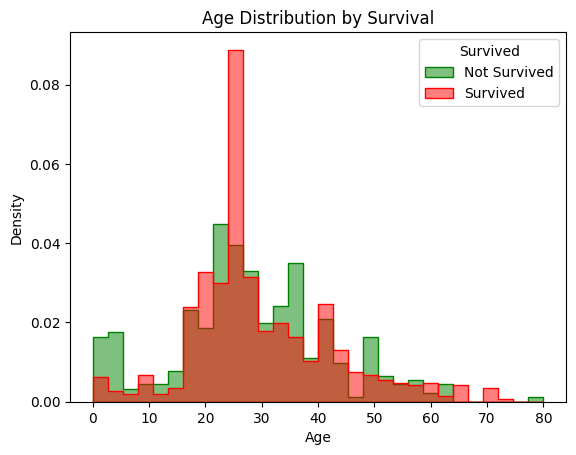

In [32]:
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=False, element='step', stat='density', common_norm=False, palette={0: 'red', 1: 'green'}, alpha=0.5)
plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()


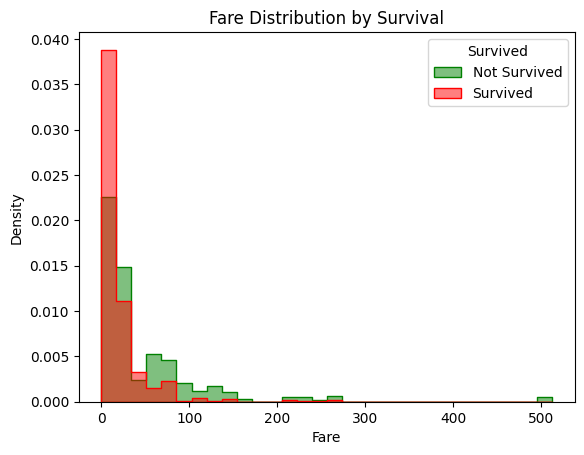

In [33]:
sns.histplot(data=df, x='Fare', hue='Survived', bins=30, kde=False, element='step', stat='density', common_norm=False, palette={0: 'red', 1: 'green'}, alpha=0.5)
plt.title('Fare Distribution by Survival')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()


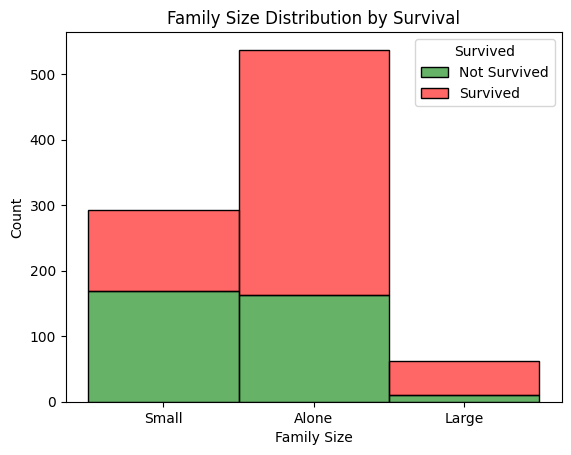

In [34]:
sns.histplot(data=df, x='Family_size', hue='Survived', multiple='stack', palette={0: 'red', 1: 'green'}, alpha=0.6)
plt.title('Family Size Distribution by Survival')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()


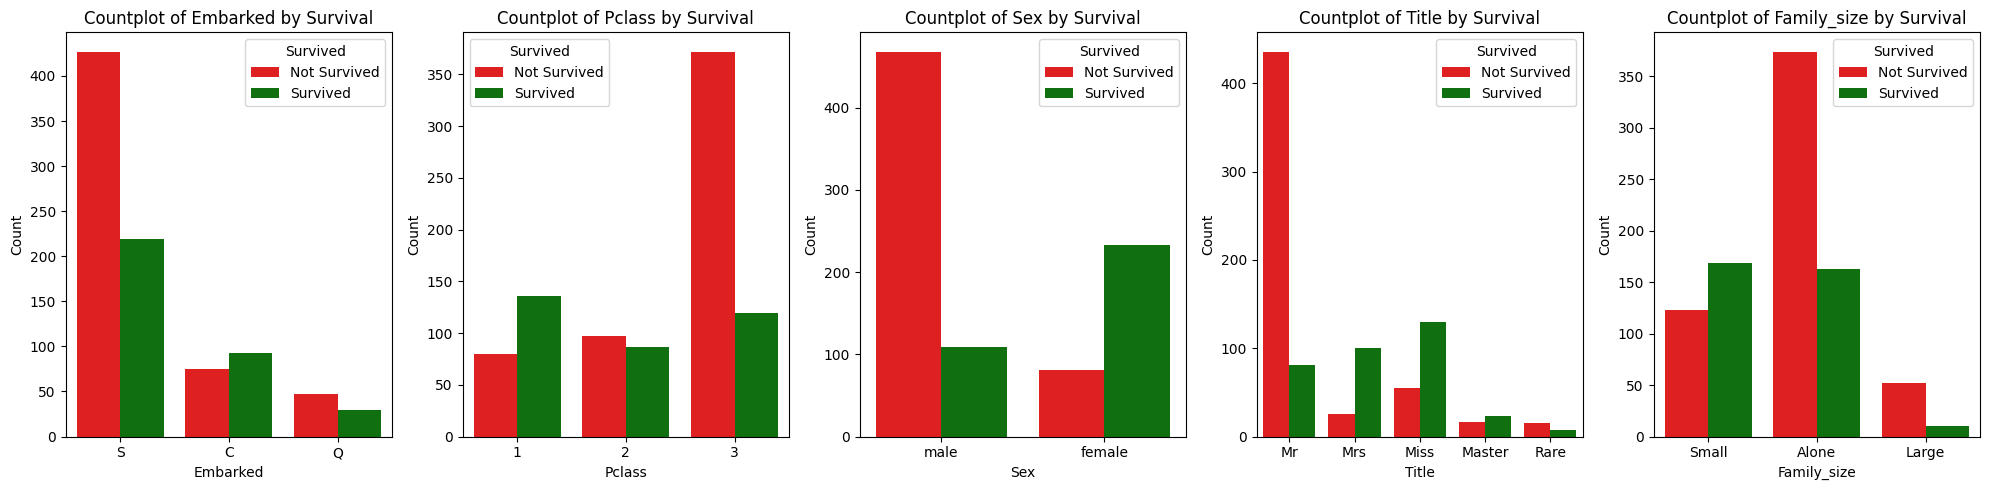

In [35]:
fig, axes = plt.subplots(1, len(col), figsize=(20, 5))

for i, c in enumerate(col):
    sns.countplot(data=df, x=c, hue='Survived', palette={0: 'red', 1: 'green'}, ax=axes[i])
    axes[i].set_title(f'Countplot of {c} by Survival')
    axes[i].set_xlabel(c)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Survived', labels=['Not Survived', 'Survived'])

plt.tight_layout()
plt.show()


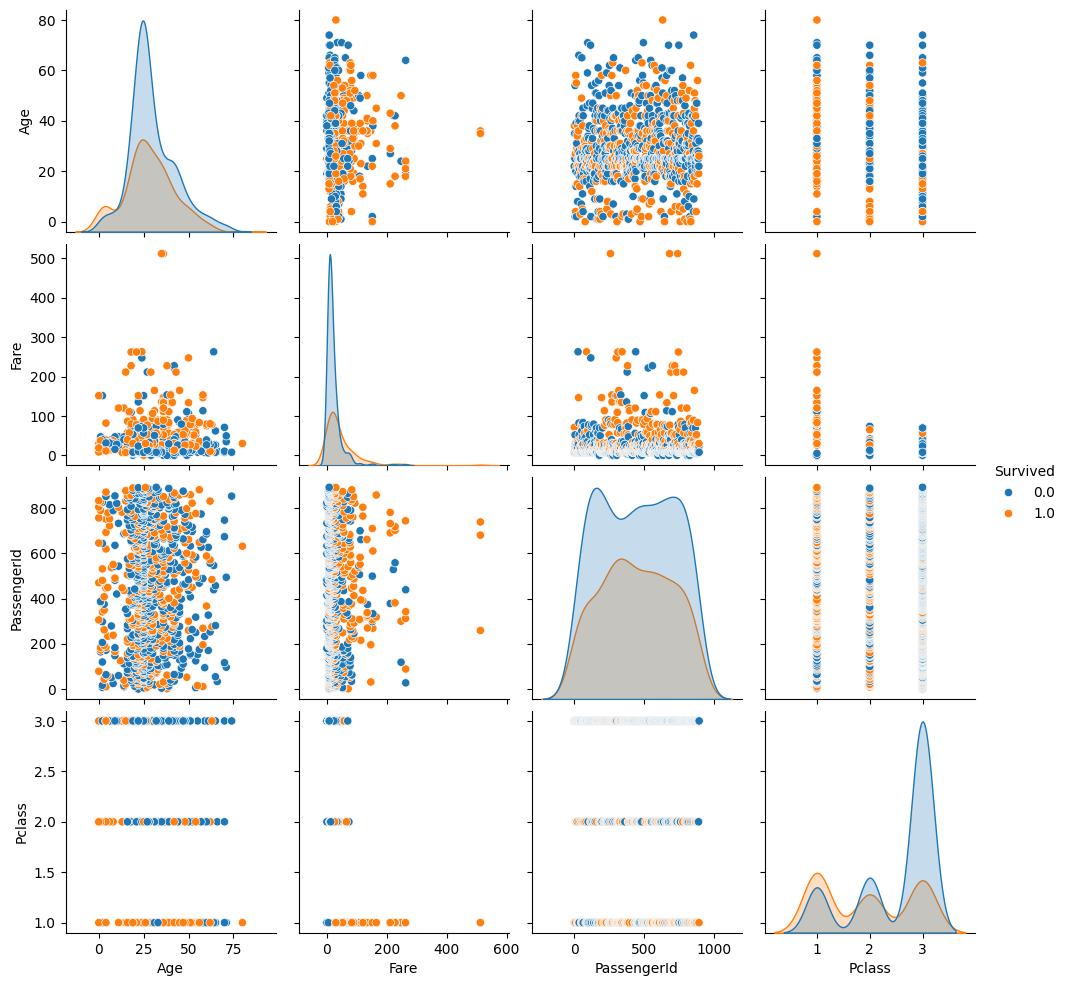

In [36]:
sns.pairplot(df,hue='Survived')

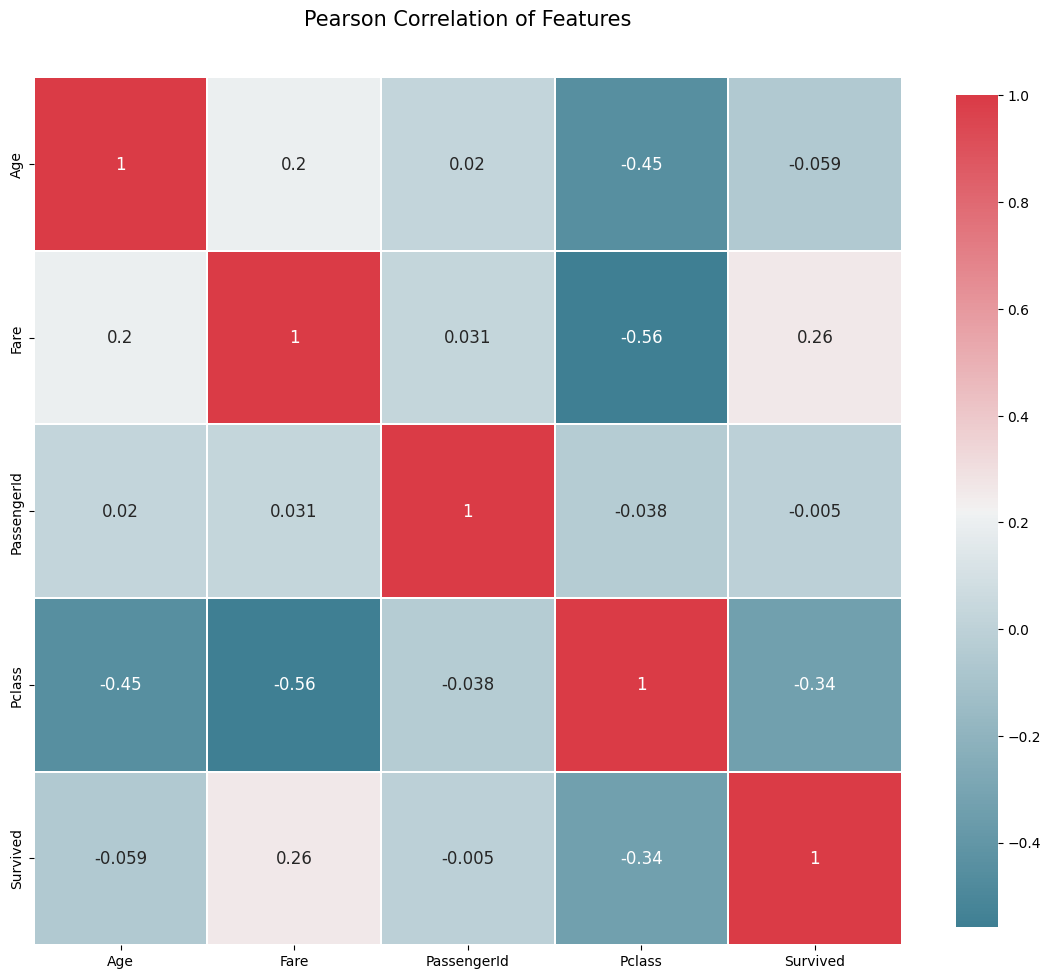

In [37]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(numeric_only=True), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(df)


## Feature Engineering¶

In [38]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import accuracy_score
from sklearn import ensemble
from sklearn import gaussian_process
from sklearn import linear_model
from sklearn import naive_bayes
from sklearn import neighbors
from sklearn import svm
from sklearn import tree
from sklearn import discriminant_analysis
# from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score


In [39]:
df.head()

,Age,Embarked,Fare,PassengerId,Pclass,Sex,Survived,Title,Family_size
0,22,S,7.2500,1,3,male,0.0,Mr,Small
1,38,C,71.2833,2,1,female,1.0,Mrs,Small
2,26,S,7.9250,3,3,female,1.0,Miss,Alone
3,35,S,53.1000,4,1,female,1.0,Mrs,Small
4,35,S,8.0500,5,3,male,0.0,Mr,Alone


### Separating the Data into Train and Test Sets

We will divide the data into training and testing sets to evaluate the model's performance.


In [40]:
train = df.loc[:890]
test = df.loc[891:]

In [41]:
test.head()

,Age,Embarked,Fare,PassengerId,Pclass,Sex,Survived,Title,Family_size
891,34,Q,7.8292,892,3,male,NaN,Mr,Alone
892,47,S,7.0000,893,3,female,NaN,Mrs,Small
893,62,Q,9.6875,894,2,male,NaN,Mr,Alone
894,27,S,8.6625,895,3,male,NaN,Mr,Alone
895,22,S,12.2875,896,3,female,NaN,Mrs,Small


In [42]:
test.drop(columns=['Survived'],inplace=True)

In [43]:
train['Survived'] = train['Survived'].astype('int64')

In [44]:
train.head()

,Age,Embarked,Fare,PassengerId,Pclass,Sex,Survived,Title,Family_size
0,22,S,7.2500,1,3,male,0,Mr,Small
1,38,C,71.2833,2,1,female,1,Mrs,Small
2,26,S,7.9250,3,3,female,1,Miss,Alone
3,35,S,53.1000,4,1,female,1,Mrs,Small
4,35,S,8.0500,5,3,male,0,Mr,Alone


In [45]:
train.shape,test.shape

((891, 9), (418, 8))

In [46]:
train = train.drop("PassengerId", axis=1)

In [47]:
X_train = train.drop("Survived", axis=1)
y_train = train["Survived"]

In [48]:
X_train.head()

,Age,Embarked,Fare,Pclass,Sex,Title,Family_size
0,22,S,7.2500,3,male,Mr,Small
1,38,C,71.2833,1,female,Mrs,Small
2,26,S,7.9250,3,female,Miss,Alone
3,35,S,53.1000,1,female,Mrs,Small
4,35,S,8.0500,3,male,Mr,Alone


In [49]:
X_train.shape,y_train.shape

((891, 7), (891,))

### Creating a Pipeline with Column Transformer

We will build a pipeline that incorporates a Column Transformer to streamline preprocessing and feature engineering.


In [50]:
num_cat_tranformation=ColumnTransformer([
                                    ('scaling',MinMaxScaler(),[0,2]),
                                    ('onehotencolding1',OneHotEncoder(),[1,3]),
                                    ('ordinal',OrdinalEncoder(),[4]),
                                    ('onehotencolding2',OneHotEncoder(),[5,6])
                                    ],remainder='passthrough')

In [51]:
bins=ColumnTransformer([
                        ('Kbins',KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile'),[0,2]),
                        ],remainder='passthrough')

In [52]:
from sklearn import set_config
set_config(display='diagram')

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_train,y_train,test_size=0.2)

In [54]:
def create_pipeline(algo):
    return Pipeline([
        ('num_cat_transformation', num_cat_tranformation),
        ('bins', bins),
        ('classifier', algo)
    ])

## Model Training

### Evaluating Various Machine Learning Models to Find the Best Performer

We will test different machine learning models to identify which one provides the best performance for our data.


In [55]:
algorithms=[
    # Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    # Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    # GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    # Naive Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    # Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    # SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    # Trees    
    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),
    
    # Discriminant Analysis
    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),
    
    # XGBoost
    ## XGBClassifier()
]

In [56]:
model_names = []
CV_Accuracy=[]
for algo in algorithms:
    pipeline = create_pipeline(algo)
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    model_names.append(algo.__class__.__name__)
    CV_Accuracy.append(scores.mean())
    
#     print(f'Model: {algo.__class__.__name__}, CV Accuracy: {scores.mean()}')
#     print('\n')

In [57]:
model_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': CV_Accuracy})

In [58]:
model_df.sort_values(by='Accuracy', ascending=False, inplace=True)

### Tuning the Top 3 Machine Learning Models for Better Results

We will focus on tuning the top 3 performing models from our data frame to enhance their performance and achieve better results.


In [59]:
model_df

,Model,Accuracy
19,LinearDiscriminantAnalysis,0.832838
16,LinearSVC,0.832838
8,RidgeClassifierCV,0.831429
6,LogisticRegressionCV,0.830040
15,NuSVC,0.824466
0,AdaBoostClassifier,0.818802
14,SVC,0.813218
12,GaussianNB,0.811731
3,GradientBoostingClassifier,0.810411
5,GaussianProcessClassifier,0.807584


In [60]:
algo1 = ensemble.RandomForestClassifier(criterion='gini',
                                           n_estimators=1750,
                                           max_depth=7,
                                           min_samples_split=6,
                                           min_samples_leaf=6,
                                           max_features='auto',
                                           oob_score=True,
                                           random_state=42,
                                           n_jobs=-1,
                                           verbose=1) 

algo2 =ensemble.GradientBoostingClassifier(max_depth= 1, max_features='auto', n_estimators=3, random_state=42, warm_start= True)
algo3=linear_model.RidgeClassifierCV()

In [61]:
pipe1=Pipeline([
        ('num_cat_transformation', num_cat_tranformation),
        ('bins', bins),
        ('classifier', algo1)
    ])

In [62]:
pipe1.fit(X_train,y_train)

InvalidParameterError: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.

In [ ]:
y_pred = pipe1.predict(X_test)
accuracy_score(y_test,y_pred)
